In [9]:
#Importer les librairies necessaires:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [10]:
#Importer le dataset "BilletsBanque"
data = pd.read_csv('DimPatientCoded.csv')
data.head()

,Unnamed: 0,Date Announced,Age Bracket,Age,Gender,Current Status,Type of trans,Nationality,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1/30/2020,0,1.0,0,1,1,India,1,2,1,4,1,0,1,0.0
1,1,2/2/2020,0,1.0,1,1,1,India,5,0,0,4,2,1,1,0.0
2,2,2/3/2020,0,1.0,1,1,1,India,1,2,1,4,1,0,1,0.0
3,3,3/2/2020,0,1.0,1,1,1,India,2,2,0,2,1,0,0,2.0
4,4,3/2/2020,0,1.0,1,1,1,India,2,0,1,4,2,0,0,4.0


In [11]:
del data['Unnamed: 0']
del data['Date Announced']
del data['Nationality']
data

,Age Bracket,Age,Gender,Current Status,Type of trans,Symptoms,JobLoss,FinancialSituation,Diseases,Profession,CovidAfterVaccin,Vaccinated,Reason
0,0,1.0,0,1,1,1,2,1,4,1,0,1,0.0
1,0,1.0,1,1,1,5,0,0,4,2,1,1,0.0
2,0,1.0,1,1,1,1,2,1,4,1,0,1,0.0
3,0,1.0,1,1,1,2,2,0,2,1,0,0,2.0
4,0,1.0,1,1,1,2,0,1,4,2,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247231,0,1.0,1,1,0,2,2,0,4,1,1,1,0.0
247232,0,1.0,1,1,0,5,2,0,2,1,0,0,5.0
247233,0,1.0,1,1,0,5,0,1,2,2,0,0,2.0
247234,0,1.0,1,1,0,5,0,1,2,2,0,1,0.0


In [12]:
#dimensions : nombre de lignes, nombre de colonnes
data.shape

(247236, 13)

In [13]:
# Pas de valeurs manquantes
data.isna().sum()

Age Bracket           0
Age                   0
Gender                0
Current Status        0
Type of trans         0
Symptoms              0
JobLoss               0
FinancialSituation    0
Diseases              0
Profession            0
CovidAfterVaccin      0
Vaccinated            0
Reason                0
dtype: int64

In [14]:
del data['Age']
del data['Gender']
del data['Current Status']
del data['Type of trans']
del data['Symptoms']
del data['JobLoss']
del data['FinancialSituation']
del data['Profession']
del data['Reason']

data = data.reindex(columns=['Diseases','Vaccinated','Age Bracket','CovidAfterVaccin'])
data

,Diseases,Vaccinated,Age Bracket,CovidAfterVaccin
0,4,1,0,0
1,4,1,0,1
2,4,1,0,0
3,2,0,0,0
4,4,0,0,0
...,...,...,...,...
247231,4,1,0,1
247232,2,0,0,0
247233,2,0,0,0
247234,2,1,0,0


In [15]:
X = data.drop("CovidAfterVaccin", axis=1)
y = data["CovidAfterVaccin"]

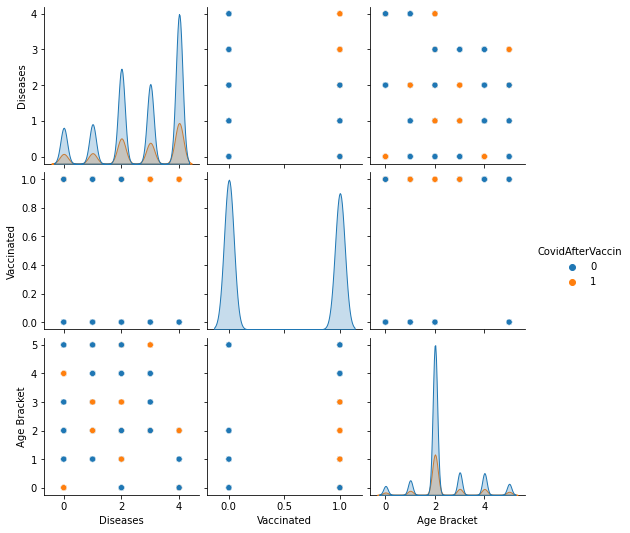

In [16]:
import seaborn as sns
sns.pairplot(data, hue="CovidAfterVaccin")

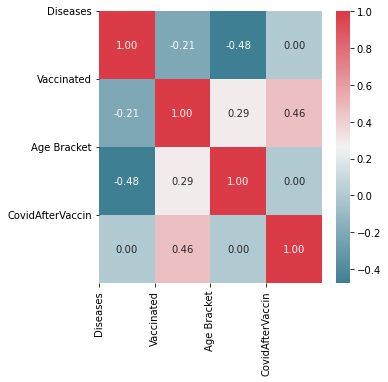

In [17]:
#Create Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(5,5))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### Params par défaut

In [19]:
#Entrainer le modèle svm 12:46
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [20]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84     39379
           1       0.41      0.51      0.45     10069

    accuracy                           0.75     49448
   macro avg       0.64      0.66      0.64     49448
weighted avg       0.77      0.75      0.76     49448



### Noyeau linéaire

In [21]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.75      0.85     49448
           1       0.00      0.00      0.00         0

    accuracy                           0.75     49448
   macro avg       0.50      0.37      0.43     49448
weighted avg       1.00      0.75      0.85     49448



### Noyeau polynomial

In [ ]:
# Kernel poly
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_3 = svm.predict(X_test)
print(classification_report(y_pred_svc_3, y_test))

### Noyeau Sigmoide

In [ ]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
print(classification_report(y_pred_svc_4, y_test))

### Noyeau Gaussien RBF

In [ ]:
# Kernel rbf (Par défaut)
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred = svm.predict(X_test)
print(classification_report(y_pred, y_test))

# Comparaison des résultats

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines RBF', 'Support Vector Machines Linaire','Support Vector Machines polynomiale',
              'Support Vector Machines sigmoïde'],
    'Score': [s1,s2, s3, 
              s4]})
models.sort_values(by="Score",ascending=False)

### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='yellow', lw=2, label='Support Vector Machine (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Naive Bayes (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
pl"t.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [ ]:
import pickle
with open('SVMAZIZ.pkl', 'wb') as file:
    pickle.dump(SVM, file)